# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

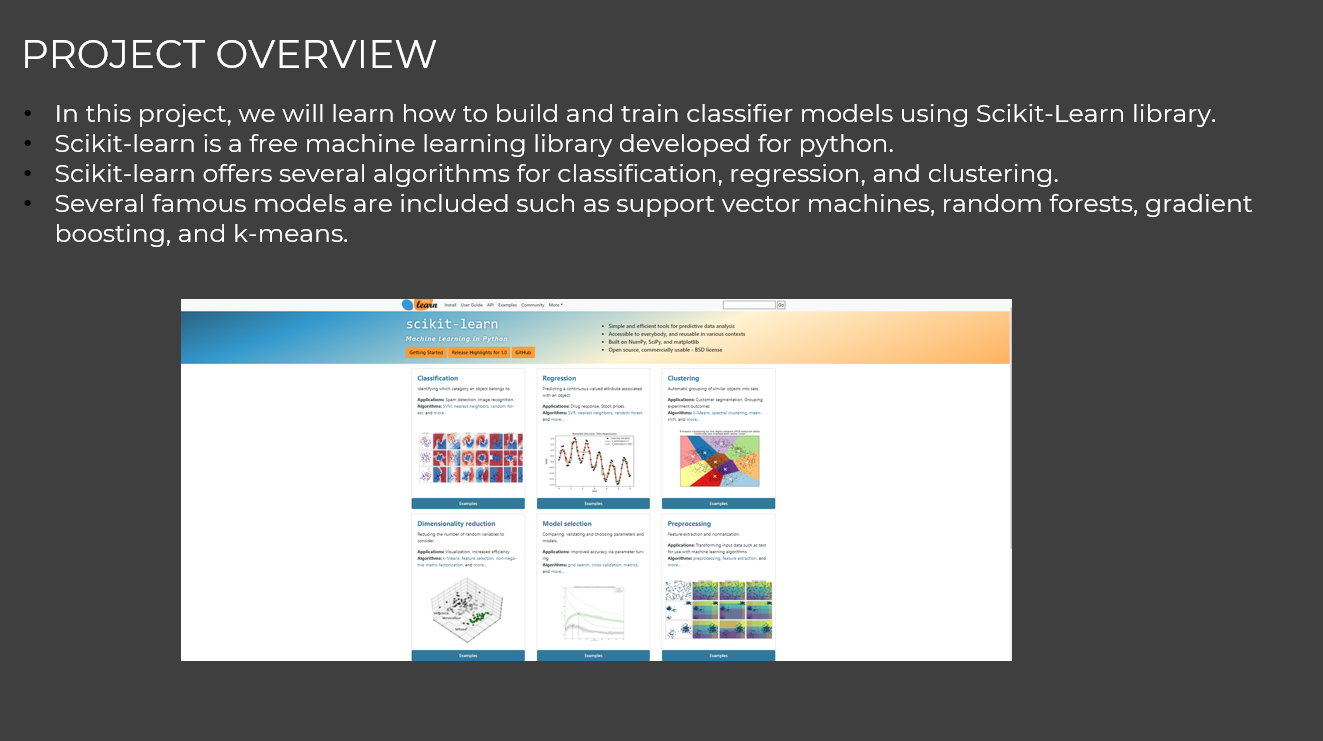

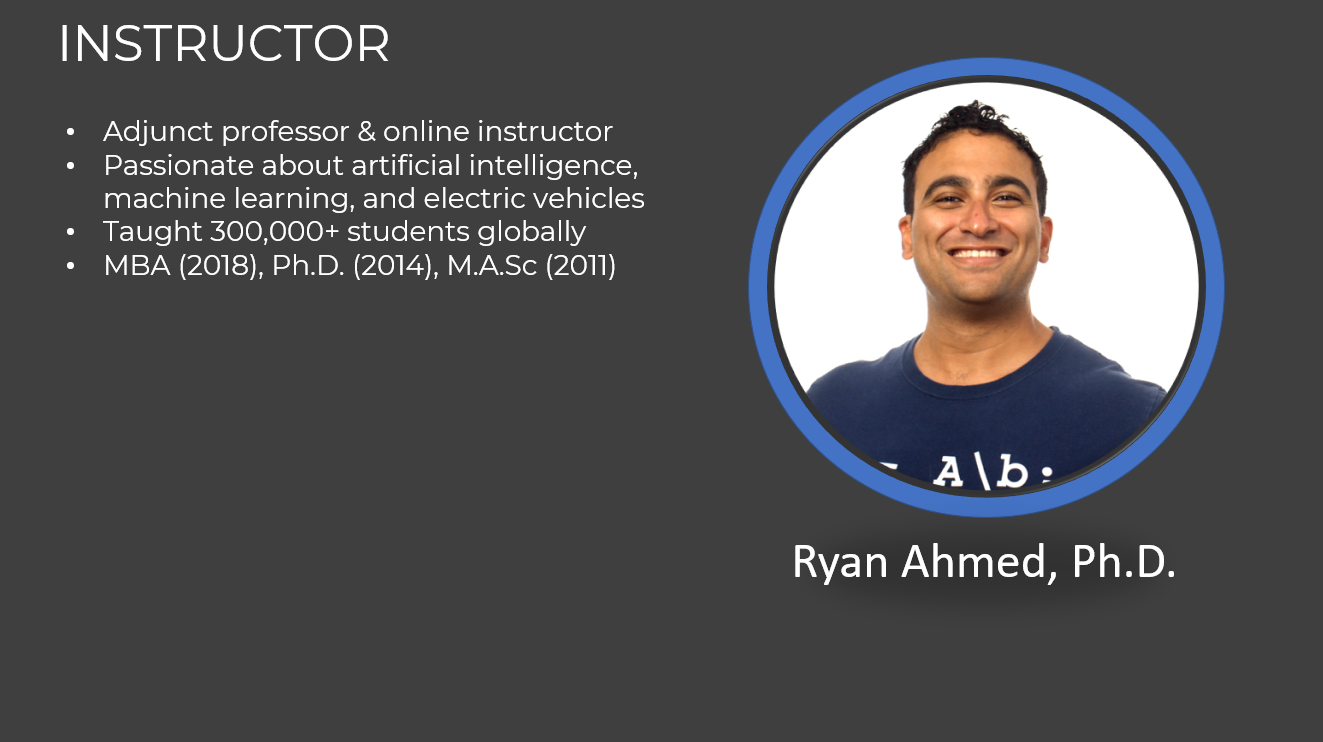

# TASK #2: IMPORT LIBARIES AND DATASETS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
# read the csv file 
df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Display the last 5, 8, and 10 rows in the df DataFrame**

In [4]:
df.tail(6)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
# Drop id
df = df.drop(columns = 'id')

In [6]:
# since the age is given in days, we convert it into years
df['age'] = df['age']/365

In [7]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Statistical summary of the dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


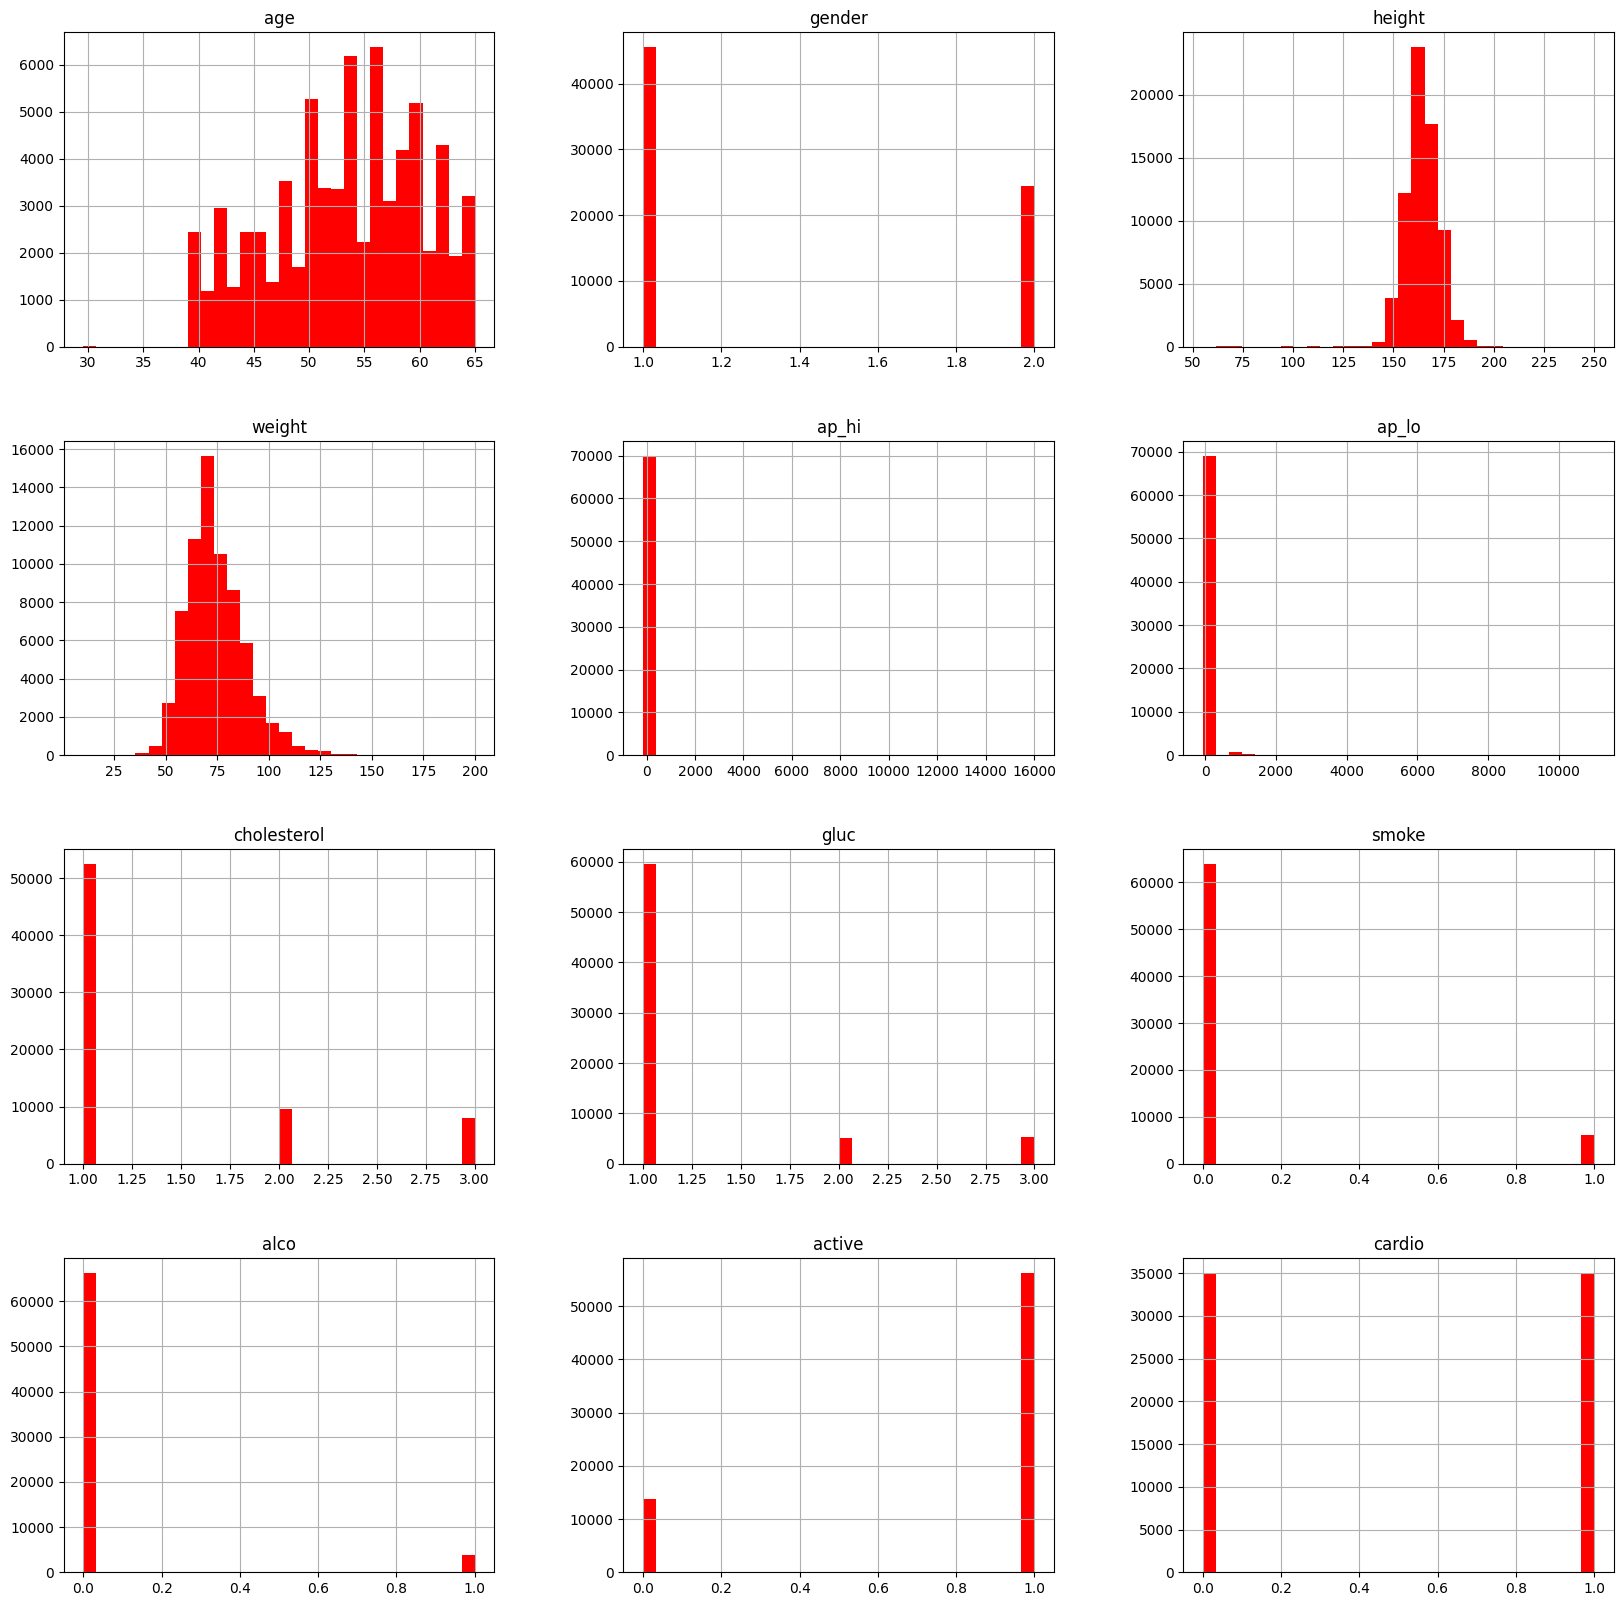

In [9]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [10]:
# get the correlation matrix
corr_matrix = df.corr()

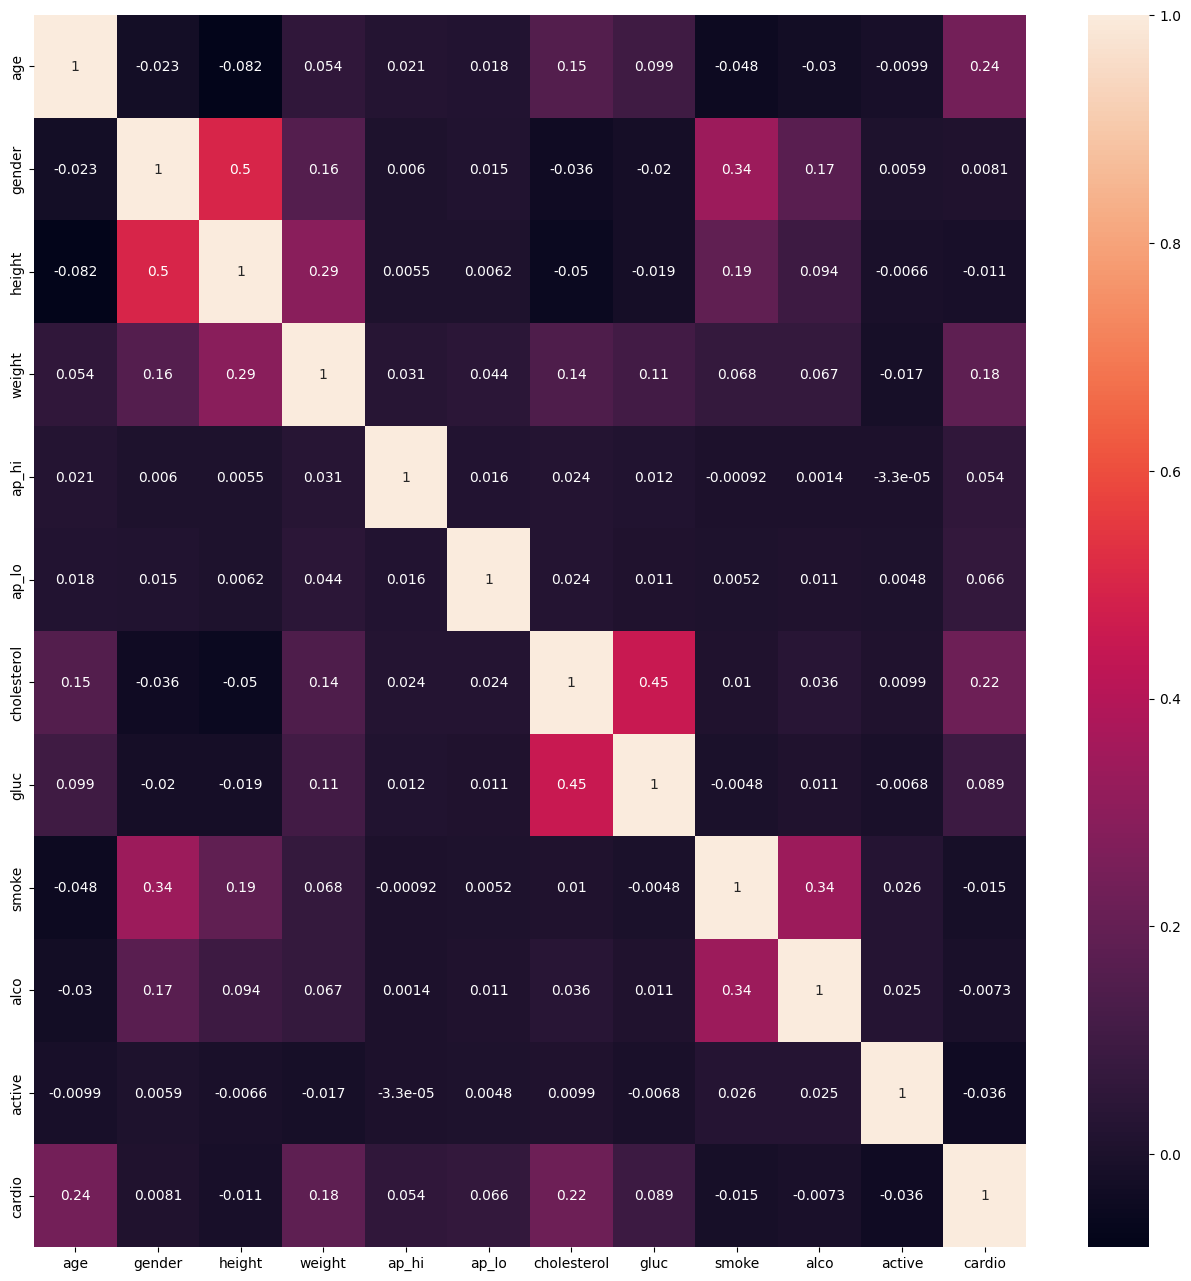

In [11]:
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [12]:
# split the dataframe into target and features
y = df['cardio']
X = df.drop(columns =['cardio'])

In [13]:
X.shape

(70000, 11)

In [14]:
y.shape

(70000,)

In [15]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [16]:
x_train_smote.shape

(56090, 11)

In [17]:
y_train_smote.shape

(56090,)

In [18]:
X_test.shape

(14000, 11)

In [19]:
y_test.shape

(14000,)

In [21]:
# Notice that inputs or data is shuffled
x_train_smote

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,41.635616,2,170,74.000000,120,80,1,1,0,0,1
1,39.838356,1,162,75.000000,120,80,1,1,0,0,1
2,62.547945,2,163,63.000000,120,80,1,3,0,0,1
3,40.309589,1,174,64.000000,160,90,2,2,0,0,1
4,57.547945,2,176,98.000000,140,90,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
56085,53.710684,2,181,90.849282,120,80,1,1,0,0,0
56086,60.747050,1,147,52.442609,130,70,1,1,0,0,1
56087,46.055574,2,175,76.000000,120,80,1,1,0,0,1
56088,41.349446,1,154,63.716718,100,60,1,1,0,0,1


# TASK #5: UNDERSTAND XG-BOOST ALGORITHM TO SOLVE CLASSIFICATION TYPE PROBLEMS

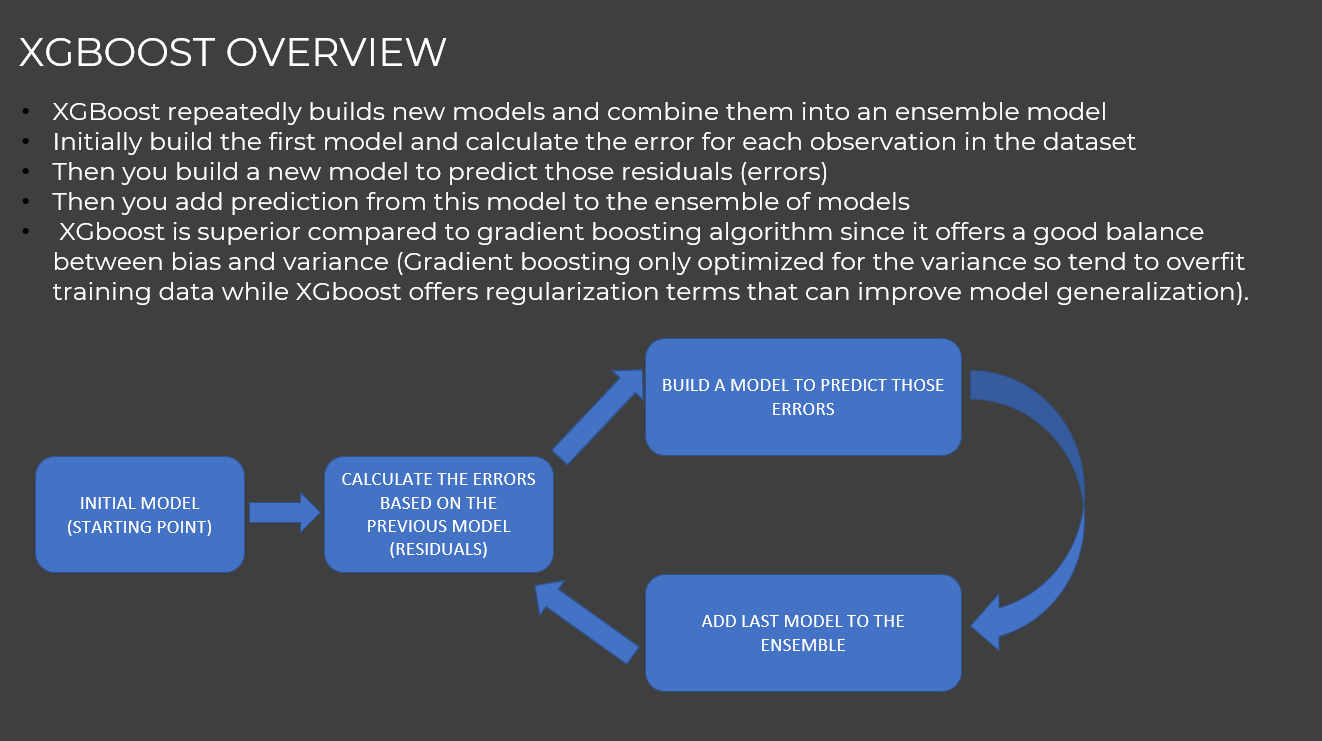

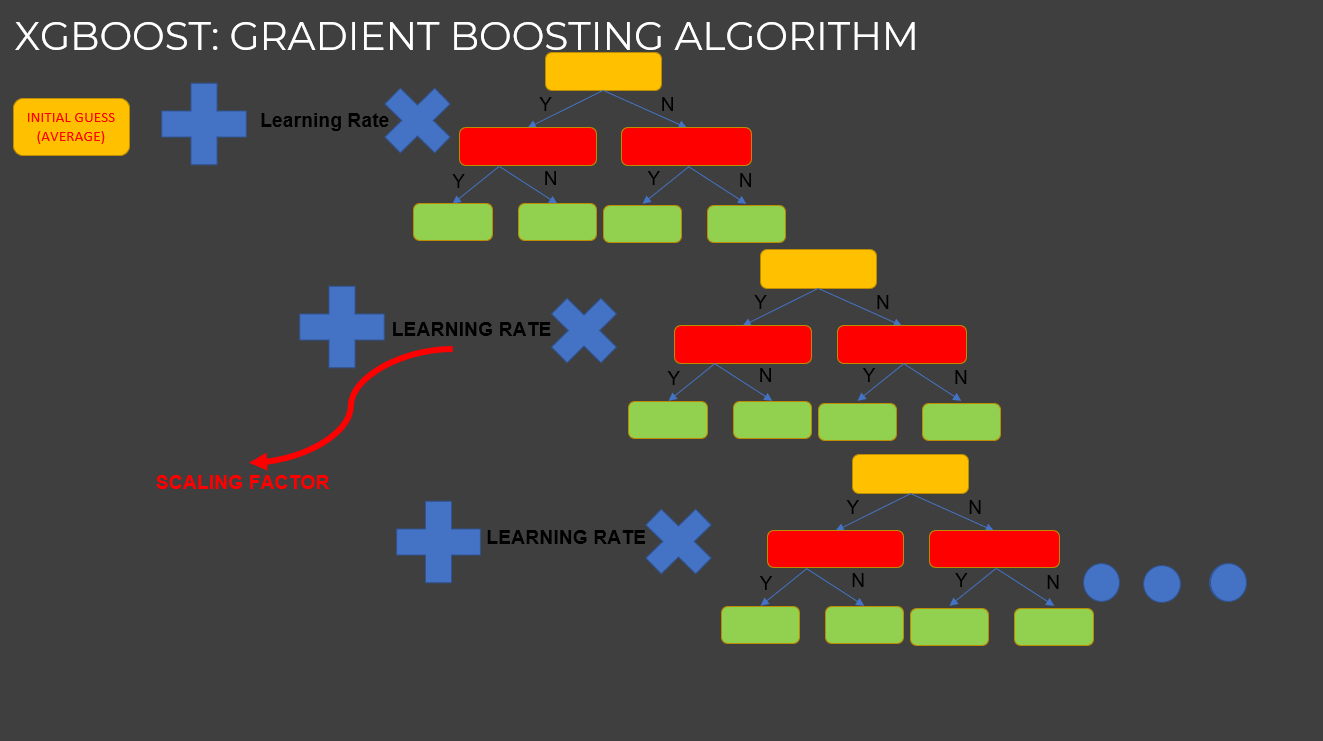

# TASK #6: TRAIN AN XG-BOOST CLASSIFIER IN SK-LEARN

In [22]:
from xgboost import XGBClassifier

In [23]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 1, n_estimators = 10)
xgb_classifier.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

# TASK #7: TEST XGBOOST CLASSIFIER TO PERFORM INFERENCE

In [24]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7177857142857142


In [25]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([0, 1, 1, ..., 1, 0, 1])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.69      0.81      0.74      7066
           1       0.76      0.62      0.69      6934

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.71     14000
weighted avg       0.72      0.72      0.72     14000



<Axes: >

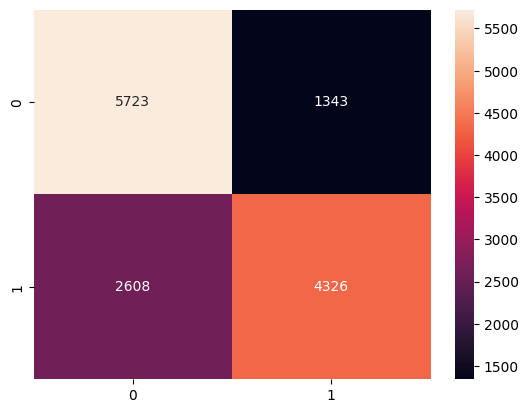

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Try a larger max_depth and retrain the model**
- **Assess the performance of the trained model**
- **What do you conclude?**

In [28]:
second_xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 5, n_estimators = 10)
second_xgb_classifier.fit(X_train, y_train)

second_result = second_xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(second_result))

# There is no change

Accuracy : 0.7348571428571429


# FINAL CAPSTONE PROJECT

Using "Diabetes.csv" dataset, perform the following:
- 1. Load the “diabetes.csv” dataset using Pandas
- 2. Split the data into 80% for training and 20% for testing 
- 3. Train an XG-Boost classifier model using SK-Learn Library
- 4. Assess trained model performance
- 5. Plot the confusion matrix
- 6. Print the classification report

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('diabetes.csv')

In [31]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

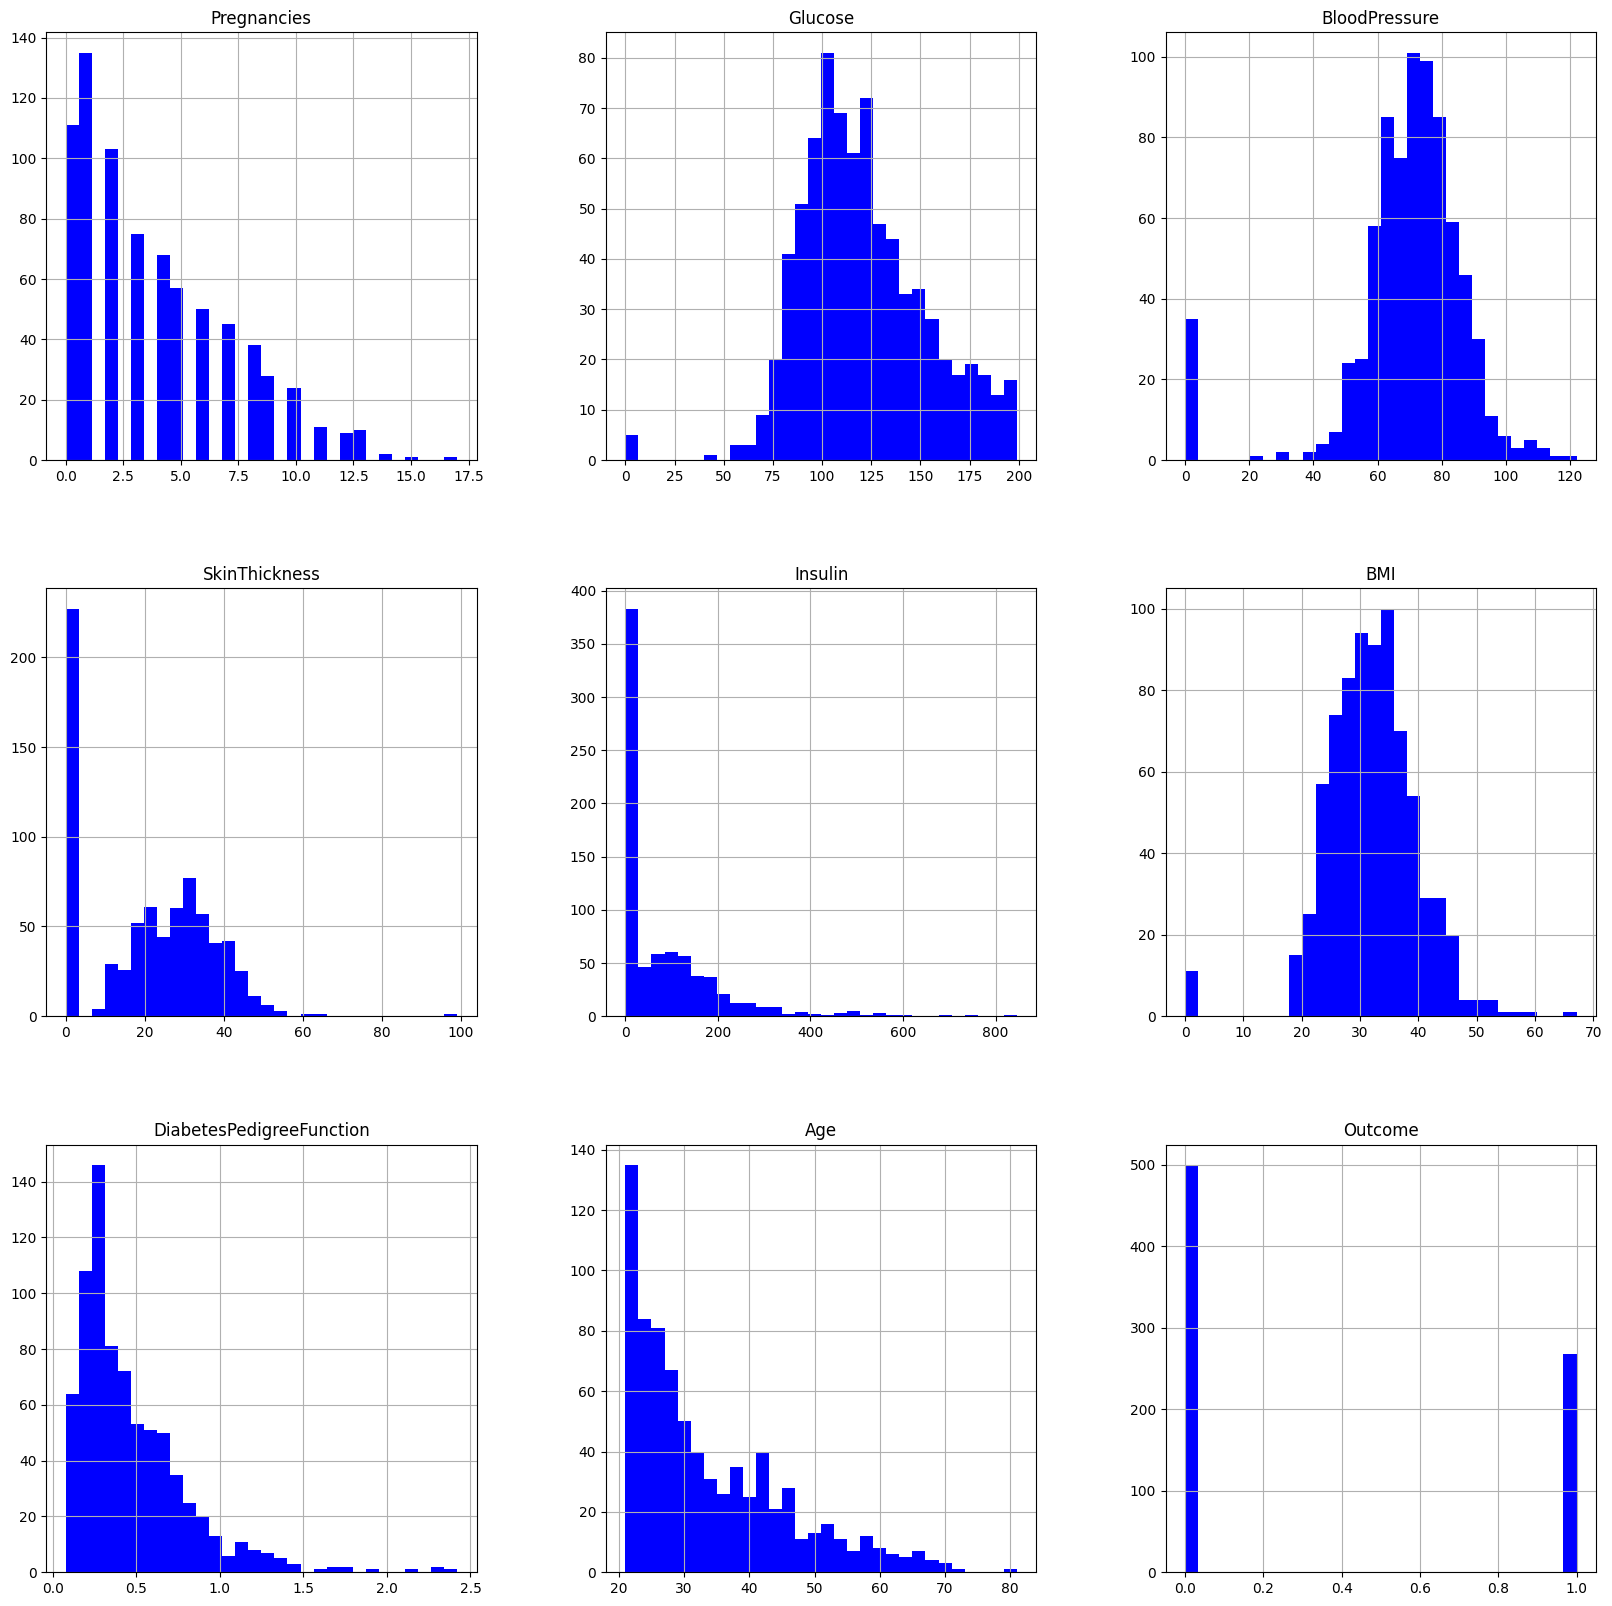

In [33]:
# Plot Histogram
df.hist(bins = 30, figsize = (20,20), color = 'b')

<Axes: >

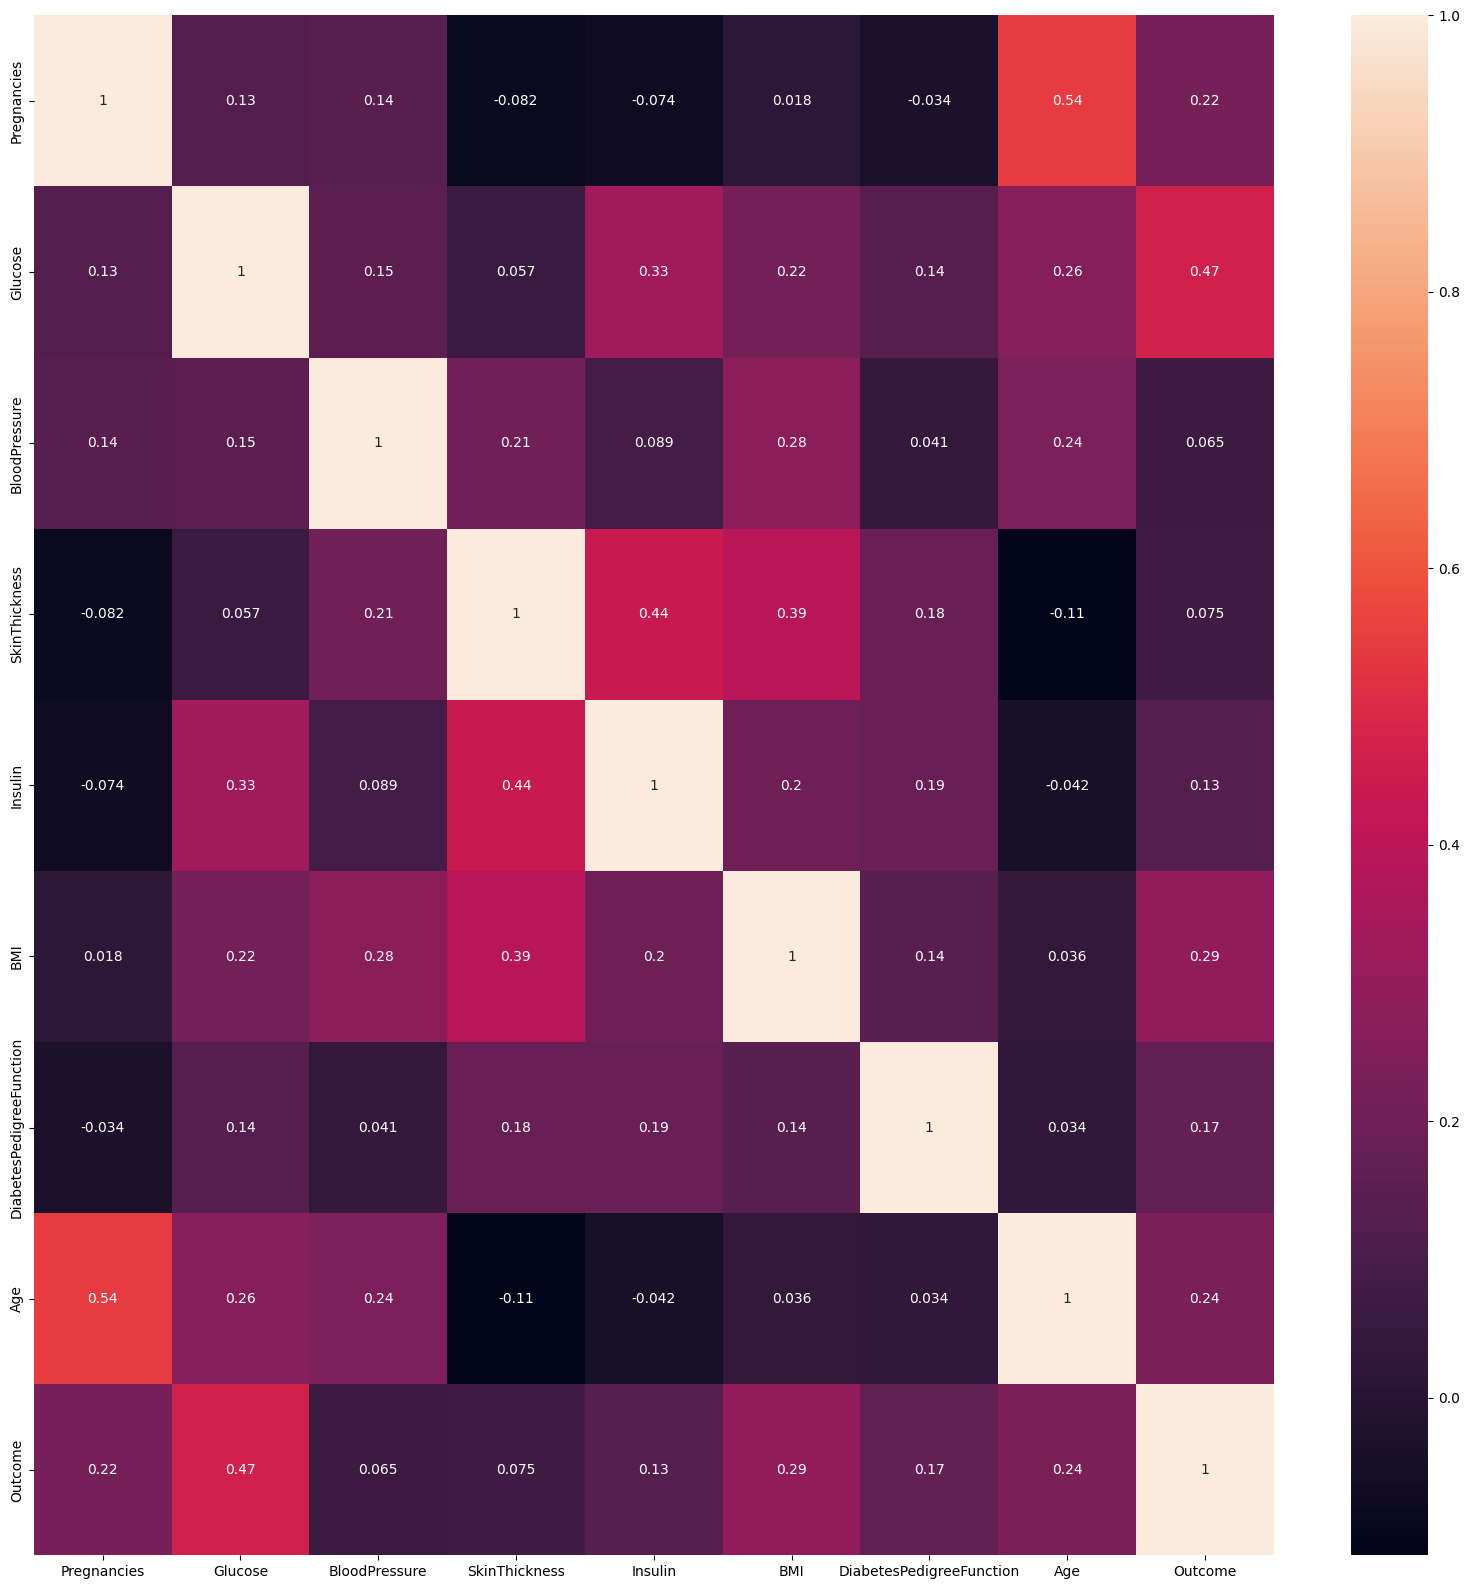

In [34]:
# Plot the correlation matrix
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [35]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [36]:
X = df.drop(['Outcome'], axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [39]:
x_train_smote.shape

(800, 8)

In [40]:
X_test.shape

(154, 8)

In [41]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 3, n_estimators = 10, use_label_encoder=False)
xgb_classifier.fit(x_train_smote, y_train_smote)

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:25:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7922077922077922


In [43]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.68      0.78      0.72        54

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.80      0.79      0.80       154



<Axes: >

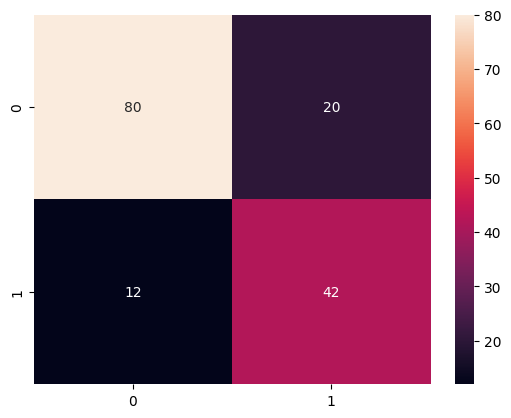

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

# EXCELLENT JOB!